<h1 style="color:#005b96;font-family: Georgia, serif;">Car price EDA and Prediction</h1> 


<h1 style="color:#005b96;font-family: Georgia, serif;">This Notebook will cover the following</h1> 

<h2 style="color:#005b96;font-family: Georgia, serif;">
    <a href="#Data_Preprocessing" style="text-decoration: none;">1.Data Preprocessing</a></h2>
<h2 style="color:#005b96;font-family: Georgia, serif;">
    <a href="#Exploratory_Data_Analysis" style="text-decoration: none;">2.Exploratory Data Analysis</a></h2>
<h2 style="color:#005b96;font-family: Georgia, serif;">
    <a href="#Feature_Selection" style="text-decoration: none;">3.Feature Selection</a></h2>
<h2 style="color:#005b96;font-family: Georgia, serif;">
    <a href="#Model_Development" style="text-decoration: none;">4.Model Development</a></h2>
    
<hr>

<p>
This dataset consist of data From 1985 Ward's Automotive Yearbook. 
<ul>
    <li>Data source: <a href="https://www.kaggle.com/datasets/toramky/automobile-dataset/data" target="_blank">kaggel Automobile Dataset</a></li>
    <li>Data type: csv</li>
</ul>
</p>


<img src="carprice.png" style="height:425px" />

<h3 style="color:#005b96;font-family: Georgia, serif;">Import libraries</h3> 

<hr/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(10,8)})



import warnings
warnings.filterwarnings("ignore")

C:\Users\Neny\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3 style="color:#005b96;font-family: Georgia, serif;">Read Automobile Dataset </h3> 

<hr/>

In [2]:
df= pd.read_csv("Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<p id="Data_Preprocessing" style="color:#005b96;font-family: Georgia, serif;font-size:22px;font-weight:bold" >1.Data Preprocessing</p> 

Data preprocessing is the process of converting data from the initial format to a format that may be better for analysis.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Table of Contents</h3>

<ol>
     <li><a href="#identify_missing_values">Identify missing values</a></li>
     <li><a href="#deal_missing_values">Deal with missing values</a></li>
     <li><a href="#correct_data_format">Correct data format</a></li>
     <li><a href="#data_standardization">Data standardization</a></li>
</ol>
</div>

<hr>

In [3]:
# no null values in all columns because we have ? instead of null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<p id="identify_missing_values" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >1.1 Identify missing values </p> 

<hr>

In [6]:
# our  null values in this data is ? so we replace it to nan to deal with it 
df.replace("?",np.nan,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
# count null values for each column
for x in df.columns :
    print(x) 
    counter = df[x].isnull().value_counts()
    print(counter)
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<p id="deal_missing_values" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >1.2 Deal with missing data </p> 


<hr>



<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<b>normalized losses column</b>

In [8]:
# Calculate the mean value for the "normalized-losses" column
mean_norm_loss = df['normalized-losses'].astype('float').mean()
print("Average of normalized-losses:",mean_norm_loss)

Average of normalized-losses: 122.0


In [9]:
# Replace "NaN" with mean value in "normalized-losses" column 
df['normalized-losses'].replace(np.nan,mean_norm_loss,inplace=True)

<b>stroke column</b>

In [10]:
# Calculate the mean value for the "stroke" column
mean_stroke = df['stroke'].astype('float').mean()
print("Average of stroke:",mean_stroke)

Average of stroke: 3.2554228855721337


In [11]:
# Replace "NaN" with mean value in "stroke" column 
df['stroke'].replace(np.nan,mean_stroke,inplace=True)

<b>bore column</b>

In [12]:
# Calculate the mean value for the "bore" column
mean_bore = df['bore'].astype('float').mean()
print("Average of bore:",mean_bore)

Average of bore: 3.3297512437810957


In [13]:
# Replace "NaN" with mean value in "bore" column 
df['bore'].replace(np.nan,mean_bore,inplace=True)

<b>horsepower column</b>

In [14]:
# Calculate the mean value for the "horsepower" column
mean_horsepower = df['horsepower'].astype('float').mean()
print("Average of horsepower:",mean_horsepower)

Average of horsepower: 104.25615763546799


In [15]:
# Replace "NaN" with mean value in "horsepower" column 
df['horsepower'].replace(np.nan,mean_horsepower,inplace=True)

<b>peak rpm column</b>

In [16]:
# Calculate the mean value for the "peak-rpm" column
mean_peak_rpm = df['peak-rpm'].astype('float').mean()
print("Average of peak rpm:",mean_peak_rpm)

Average of peak rpm: 5125.369458128079


In [17]:
# Replace "NaN" with mean value in "peak-rpm" column 
df['peak-rpm'].replace(np.nan,mean_peak_rpm,inplace=True)

<b>Replace NaN by frequency:</b>

In [18]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
# Calculate the frequency value for the "num of doors" column
mode = df['num-of-doors'].mode()[0]
print(mode)

four


In [20]:
# Replace "NaN" with frequency value in "num of doors" column 
df['num-of-doors'].replace(np.nan,mode,inplace=True)

<b>Drop the whole row:</b>

<b>Drop all rows that do not have price data</b>

In [21]:
# simply drop whole row with NaN in "price" column   
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True) 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Now, we have a dataset with no missing values.


<p id="correct_data_format" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >1.3 Correct data format </p> 

<p>The third step in data preprosessing is checking and making sure that all data is in the correct format (int, float, text or other).</p>

<hr>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [23]:
# as type float
df['normalized-losses']=df['normalized-losses'].astype('int')

In [24]:
# as type int
df[['bore','horsepower','peak-rpm','price']] = df[['bore','horsepower','peak-rpm','price']].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

<p id="data_standardization" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >1.4 Data Standardization</p> 

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>

<hr>

In [26]:
df[['city-mpg', "highway-mpg"]]=235/df[['city-mpg', "highway-mpg"]]
df.rename(columns={'city-mpg':'city-L/100km', "highway-mpg":"highway-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115.0,5500.0,13.055556,10.681818,17450.0


<p id="Exploratory_Data_Analysis" style="color:#005b96;font-family: Georgia, serif;font-size:22px;font-weight:bold" >2.Exploratory Data Analysis</p> 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Table of Contents</h3>

<ol>
     <li><a href="#Categorical_features">Categorical features</a></li>
     <li><a href="#Numerical_features">Numerical features</a></li>
</ol>
</div>
 
<hr>

<p id="Categorical_features" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >2.1 Categorical features</p> 

### Visualise different car names

<hr>

In [27]:
car_name=pd.DataFrame(df['make'].value_counts()).reset_index().rename(columns={'index':'CarName','make': 'count'})

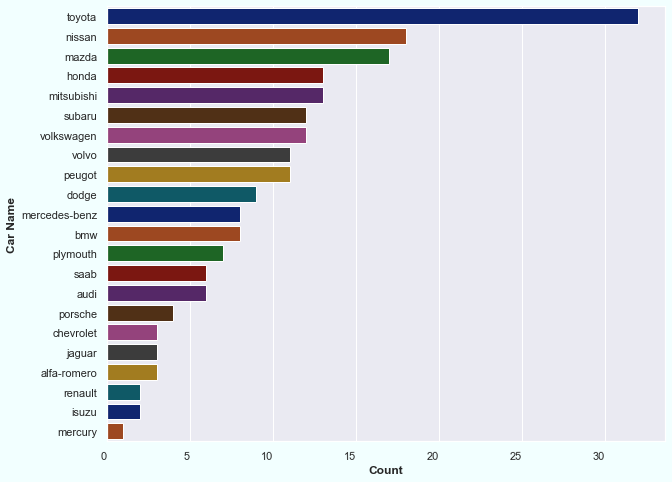

In [28]:
custom_colors = sns.color_palette("dark")

plot = sns.barplot(y='CarName', x='count', data=car_name,palette=custom_colors)


plot.set_xlabel('Count', fontsize=12, fontweight='bold')
plot.set_ylabel('Car Name', fontsize=12, fontweight='bold')

plt.setp(plot.get_xticklabels(), rotation=1, ha="right")
plot.figure.set_facecolor('#F2FFFF')  

plt.show()

According to the dataset-
<ul>
    <li>Toyota is the most suitable car</li>
    <li>mercury is the least suitable car</li>
    </ul>

### Fuel type Ratio

<hr>

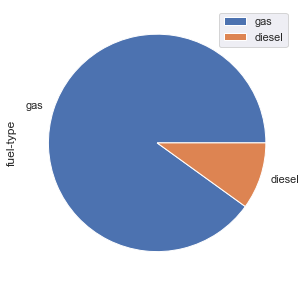

In [29]:
fuel_type_count=pd.DataFrame(df['fuel-type'].value_counts())

plot = fuel_type_count.plot.pie(y='fuel-type', figsize=(5, 5))

<ul><li>Most of the car has gas fuel</li></ul>

### Price distribution of cars

<hr>

<AxesSubplot:xlabel='price', ylabel='Density'>

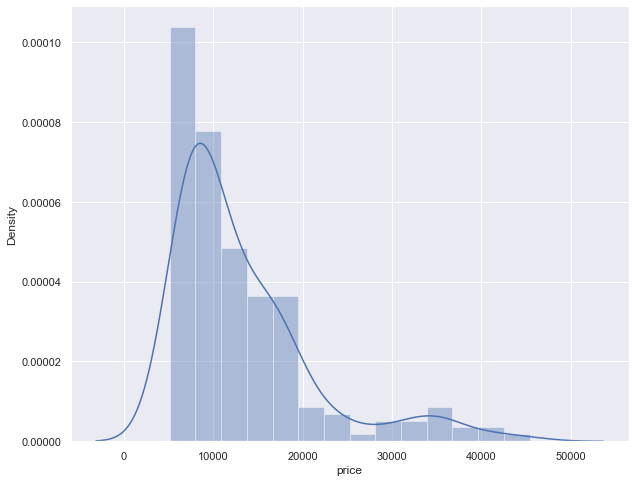

In [30]:
sns.distplot(df['price'],kde=True)

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

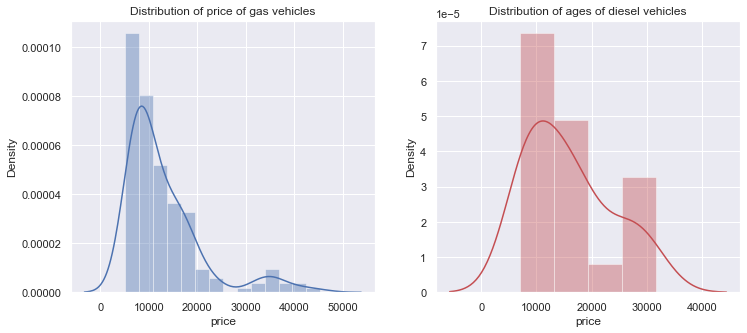

In [31]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['fuel-type']== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df['fuel-type'] == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

### Price distribution according to num of doors

<hr>

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

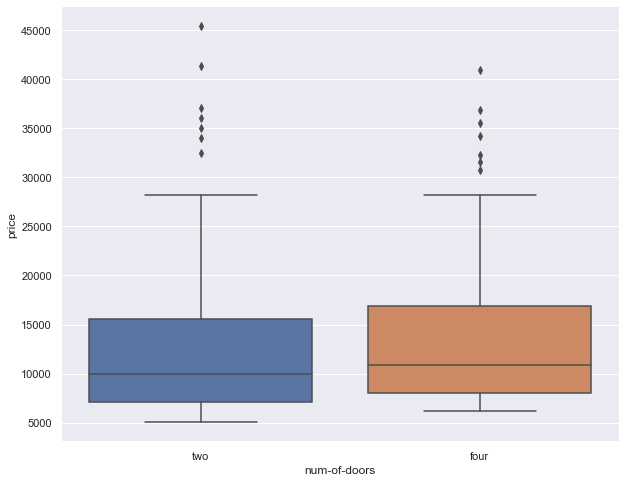

In [32]:
sns.boxplot(x = 'num-of-doors', y = 'price', data = df)

<ul><li>As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors</li></ul>

### Price distribution according to body style

<hr>

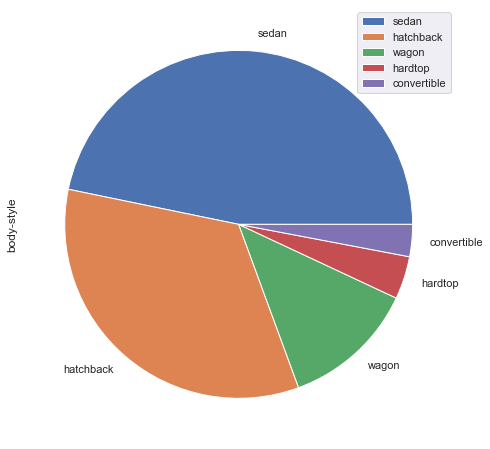

In [33]:
body_style_count=pd.DataFrame(df['body-style'].value_counts())
plot = body_style_count.plot.pie(y='body-style', figsize=(8, 8))

<ul><li>majority of car body are sedan and hatchback</li></ul>

<AxesSubplot:xlabel='body-style', ylabel='price'>

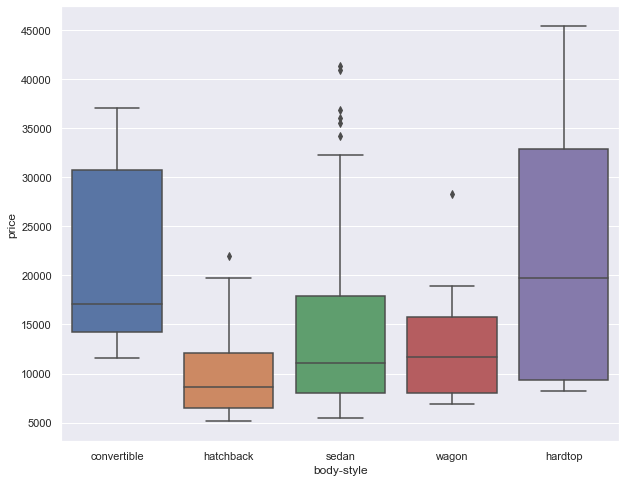

In [34]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

<ul><li>price of hardtop is very high compare to others</li></ul>

### Price distribution according to drive wheels

<hr>

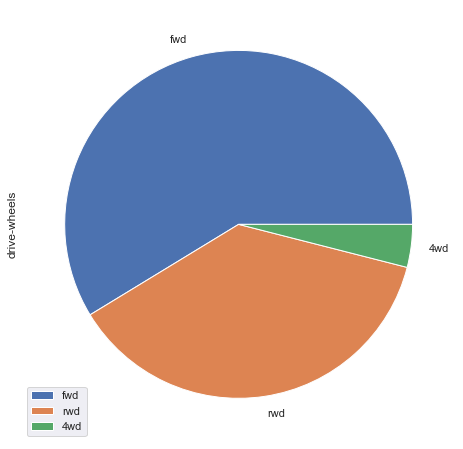

In [35]:
drive_wheels_count=pd.DataFrame(df['drive-wheels'].value_counts())
plot = drive_wheels_count.plot.pie(y='drive-wheels', figsize=(8, 8))

<ul><li>Maximum cars has fwd drive wheel</li></ul>

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

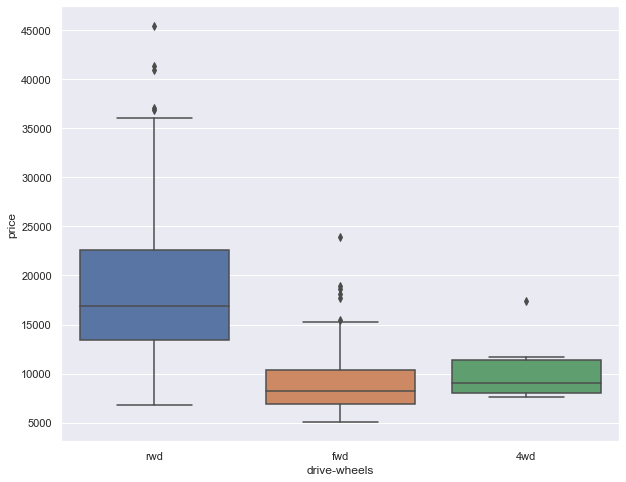

In [36]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

<ul><li>Price range of rwd drivewheel cars is quite high compare to others</li></ul>

### Engine location

<hr>

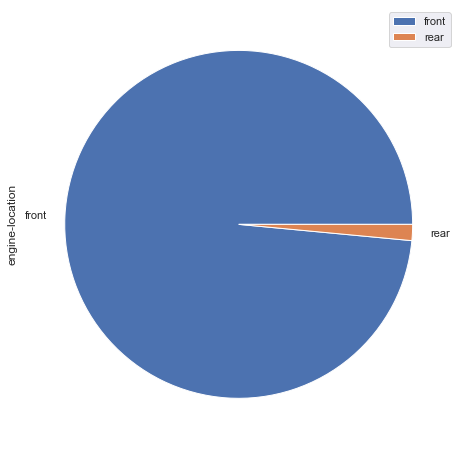

In [37]:
engine_location_count=pd.DataFrame(df['engine-location'].value_counts())
plot = engine_location_count.plot.pie(y='engine-location', figsize=(8, 8))

<ul><li>less number of cars having rear engine</li></ul>

### Price distribution according to engine type

<hr>

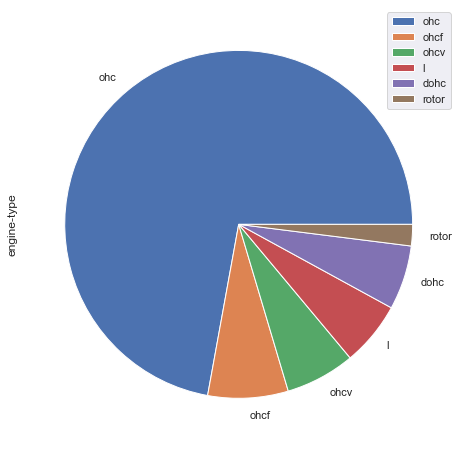

In [38]:
engine_type_count=pd.DataFrame(df['engine-type'].value_counts())
plot = engine_type_count.plot.pie(y='engine-type', figsize=(8, 8))

<ul><li>Maximum number of engine type are of 'ohc'</li></ul>

<AxesSubplot:xlabel='engine-type', ylabel='price'>

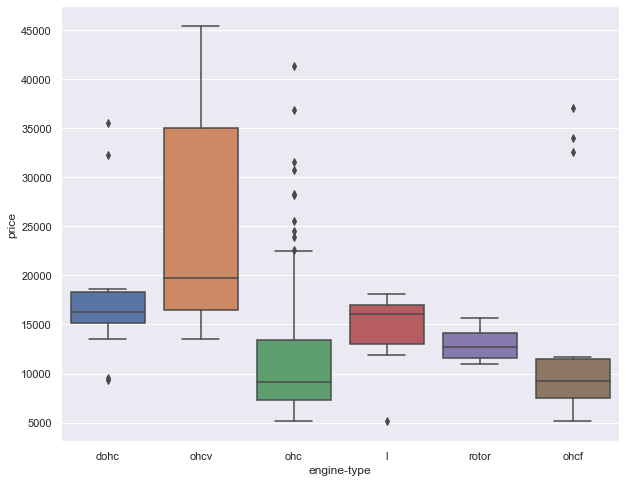

In [39]:
sns.boxplot(x = 'engine-type', y = 'price', data = df)

<ul><li>price range of ohcv engine cars are quite high in compare to others</li></ul>

### Price distribution according to num of cylinders

<hr>

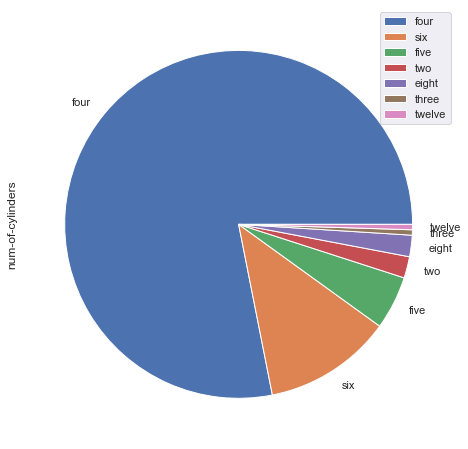

In [40]:
# num-of-cylinders
num_of_cylinders_count=pd.DataFrame(df['num-of-cylinders'].value_counts())
plot = num_of_cylinders_count.plot.pie(y='num-of-cylinders', figsize=(8, 8))

<ul><li>maximum cars are of four cylinder number</li></ul>

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

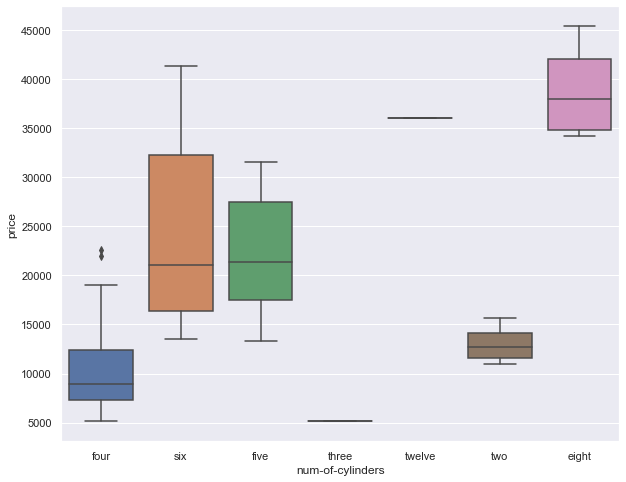

In [41]:
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df)

<ul><li>there is only 1 car having cylinder number 3 and 12 </li>
    <li>car having cylinder number eight has higher price range.</li></ul>

### Price distribution according to Fuel system

<hr>

<AxesSubplot:xlabel='count', ylabel='fuel-system'>

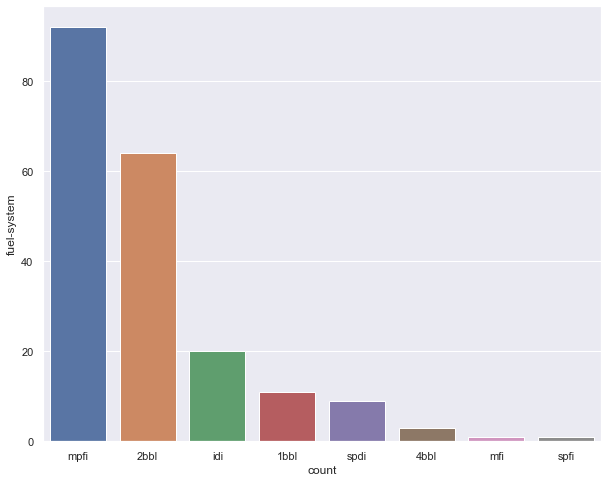

In [42]:
fuel_system_count=pd.DataFrame(df['fuel-system'].value_counts()).reset_index().rename(columns={'index':'count',})
#fuel_system_count
sns.barplot(x='count',y='fuel-system',data=fuel_system_count)

<ul><li>most number of cars having fuel system mpfi </li>
    <li>least number of cars having fuel system mfi and spfi</li></ul>

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

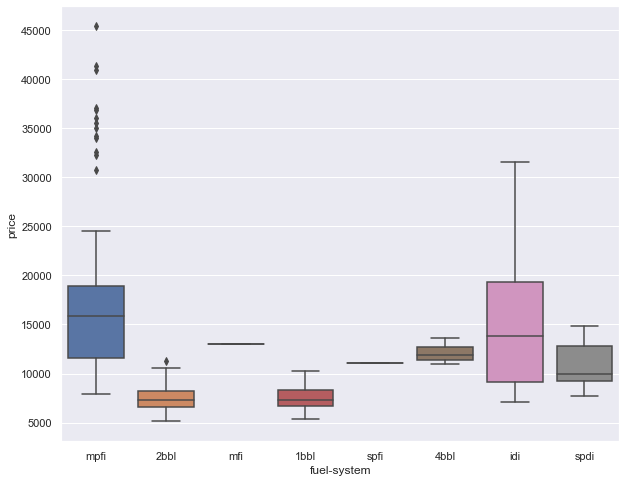

In [43]:
sns.boxplot(x = 'fuel-system', y = 'price', data = df)

<ul><li>price range are high of car having idi fuel system</li></ul>

<p id="Numerical_features" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >2.2 Numerical features</p> 

<hr>

### Wheel base Vs Car Price

<hr/>

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

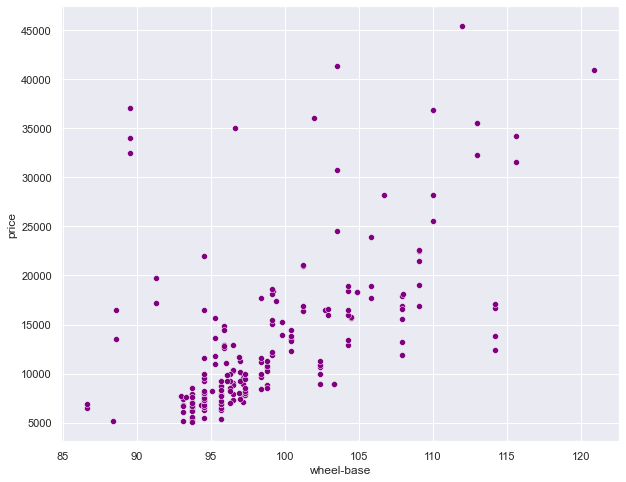

In [44]:
sns.scatterplot(x="wheel-base", y="price", data=df,color='purple')

<ul><li>Highly scattered points</li></ul>

### Car length Vs Car price

<hr/>

<AxesSubplot:xlabel='length', ylabel='price'>

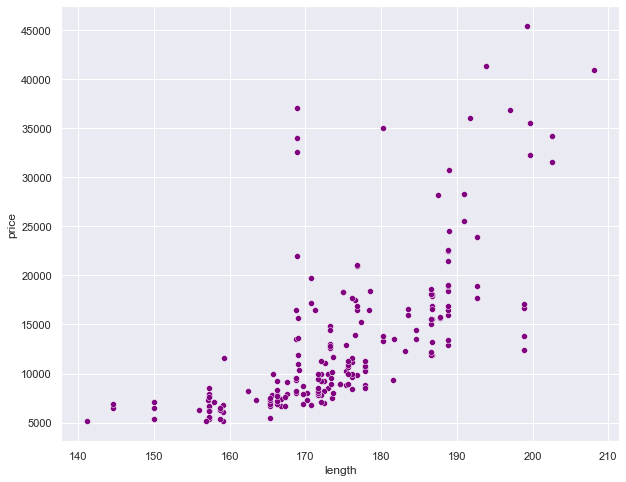

In [45]:
sns.scatterplot(x="length", y="price", data=df,color='purple')

<ul><li>car length also scattered but less scattered than wheelbase</li></ul>

### Car width Vs Car price

<hr/>

<AxesSubplot:xlabel='width', ylabel='price'>

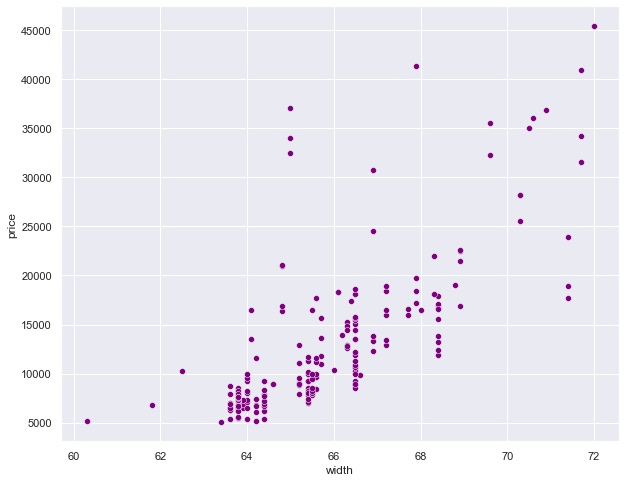

In [46]:
sns.scatterplot(x="width", y="price", data=df,color='purple')

### Curb weight Vs Car Price

<hr/>

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

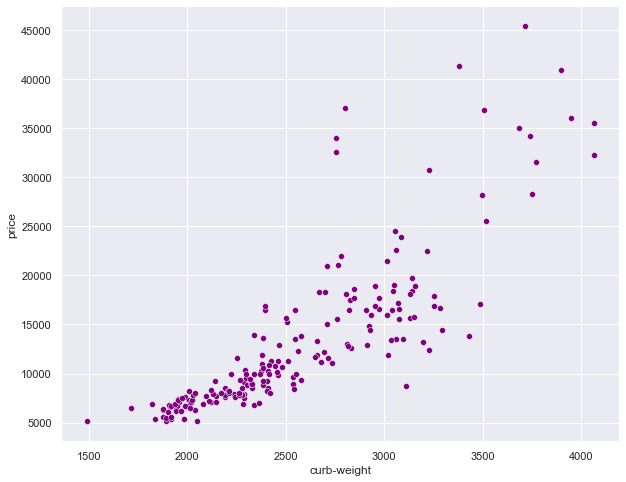

In [47]:
sns.scatterplot(x="curb-weight", y="price", data=df,color='purple')


<ul><li>points are scattered after curbweight of 2800, initially it is increasing as curbweight increases</li></ul>

### Engine size Vs Car Price

<hr/>

<AxesSubplot:xlabel='engine-size', ylabel='price'>

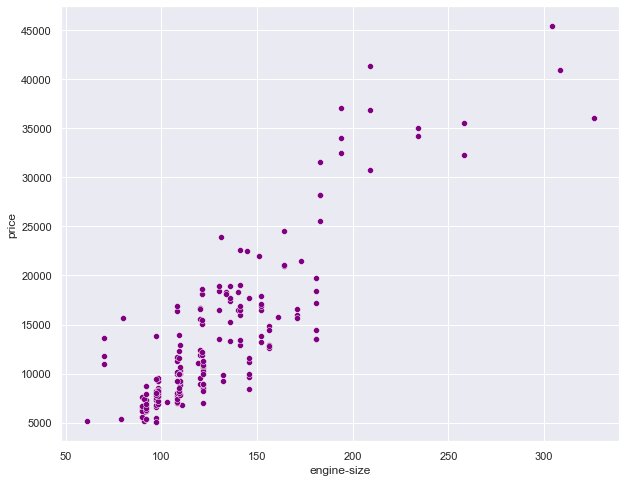

In [48]:
sns.scatterplot(x="engine-size", y="price", data=df,color='purple')

<ul><li>points are scattered after engine size of 140</li></ul>

### Horsepower Vs Car Price


<hr/>

<AxesSubplot:xlabel='horsepower', ylabel='price'>

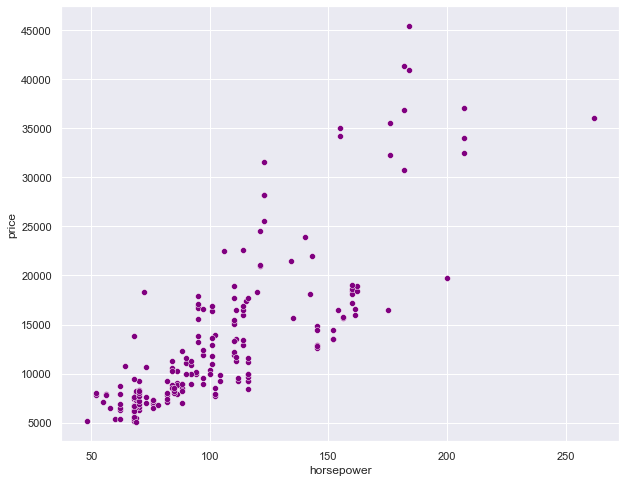

In [49]:
sns.scatterplot(x="horsepower", y="price", data=df,color='purple')

<ul><li>points are scattered after engine size of 120</li></ul>

### city-L/100km Vs Car Price

<hr/>

<AxesSubplot:xlabel='city-L/100km', ylabel='price'>

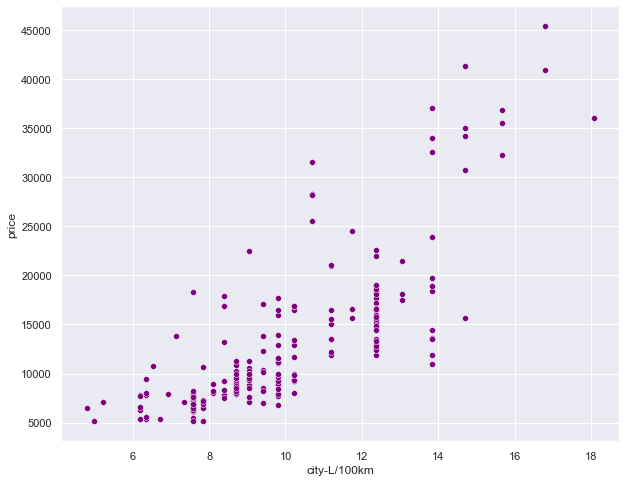

In [50]:
sns.scatterplot(x="city-L/100km", y="price", data=df,color='purple')

### highwayL/100km Vs Car Price

<hr/>

<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

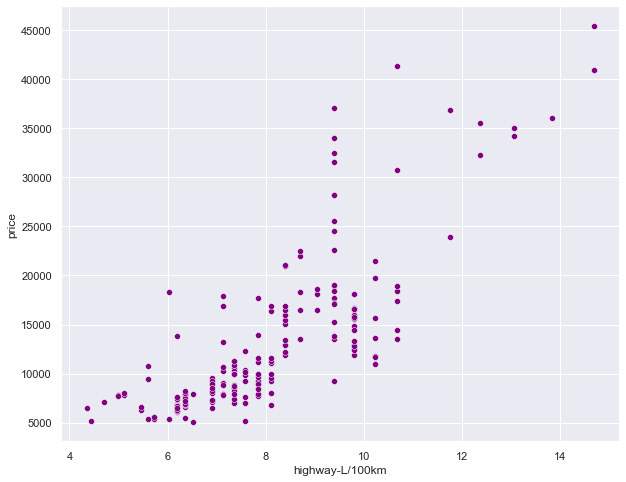

In [51]:
sns.scatterplot(x="highway-L/100km", y="price", data=df,color='purple')

<p id="Feature_Selection" style="color:#005b96;font-family: Georgia, serif;font-size:22px;font-weight:bold" >3.Feature Selection</p> 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Table of Contents</h3>

<ol>
     <li><a href="#Categorical_features_selection">Categorical features</a></li>
     <li><a href="#Numerical_features_selection">Numerical features</a></li>
</ol>
</div>
 
Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

<hr>


<p id="Categorical_features_selection" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >3.1 Categorical features</p> 


In [52]:
df.drop(columns='make',inplace=True)
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'stroke'],
      dtype='object')

In [53]:
df.describe(include=['object'])

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,stroke
count,201,201,201,201,201,201,201,201,201,201
unique,2,2,2,5,3,2,6,7,8,37
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.4
freq,181,165,115,94,118,198,145,157,92,19


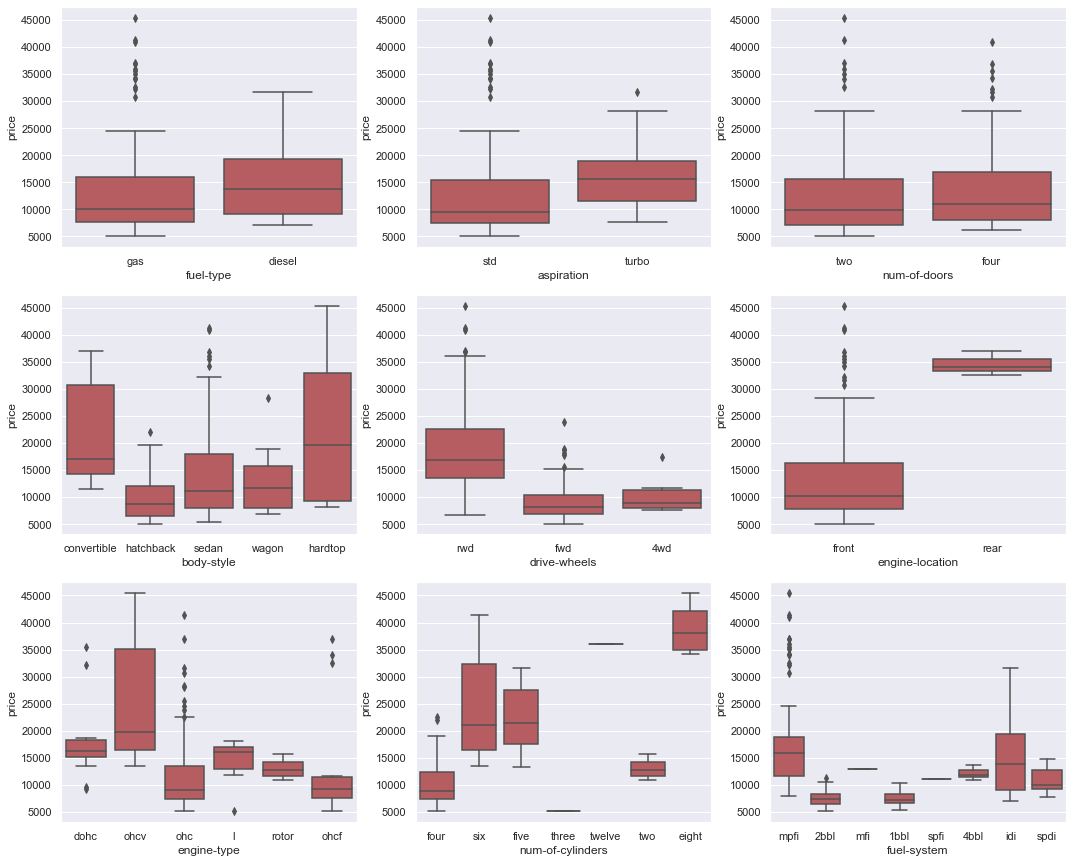

In [54]:
fig,axes = plt.subplots(3,3,figsize=(18,15))
for seg,col in enumerate(categorical_cols[:len(categorical_cols)-1]):
    
    x,y = seg//3,seg%3
    sns.boxplot(x=col, y='price' ,data=df,ax=axes[x][y],color='r')

In [55]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

<b>Relationship between "Categorical features" and "price".</b>

Strong Relationship
<ul>
    <li>We see that the distributions of price between gas and diesel , <code>fuel-type</code> it may be a good predictor</li>
    <li>We see that the distributions of price between std and turbo , <code>aspiration</code> it may be a good predictor</li>
    <li>We see that the distributions of price between rwd,fwd and 4wd , <code>drive-wheels</code> it may be a good predictor</li>
    

</ul>
Weak Relationship
<ul>
    <li>We see that the distributions of price between the different num-of-doors categories have a significant overlap, so         <code>num-of-doors</code> would not be a good predictor of price.</li>
    <li>We see that the distributions of price between the different body-style categories have a significant overlap, so           <code>body-style</code> would not be a good predictor of price</li>
    <li>the distribution of price between these two engine-location categories, front and rear, are distinct enough to take         <code>engine-location</code> as a potential good predictor of price.
      After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the <code>engine-location</code></li>
           
<li>We see that the distributions of price between the different engine-type categories have a significant overlap, so         <code>engine-type</code> would not be a good predictor of price.</li>
<li>We see that the distributions of price between the different num-of-cylinders categories have a significant overlap, so         <code>num-of-cylinders</code> would not be a good predictor of price.</li>
<li>We see that the distributions of price between the different fuel-system categories have a significant overlap, so         <code>fuel-system</code> would not be a good predictor of price.</li>
    

</ul>

<p id="Numerical_features_selection" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >3.2 Numerical features</p> 


<hr>

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price.

In [56]:
numerical_cols=df.select_dtypes(exclude=['object']).columns

In [57]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.182196,0.075819,0.279740,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,-0.114713,0.217299,0.239543,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.250313,0.371147,-0.360305,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.159733,0.579821,-0.285970,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.189867,0.615077,-0.245800,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,0.259737,-0.087027,-0.309974,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.156433,0.757976,-0.279361,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.028889,0.822676,-0.256733,0.745059,0.783465,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,0.001263,0.566936,-0.267392,0.554610,0.559112,0.543155
compression-ratio,-0.182196,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,1.000000,-0.214514,-0.435780,-0.299372,-0.223361,0.071107


<AxesSubplot:>

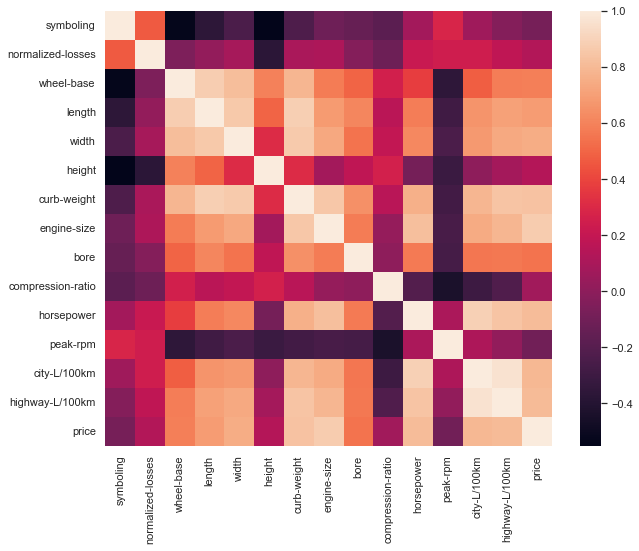

In [58]:
sns.heatmap(df.corr())

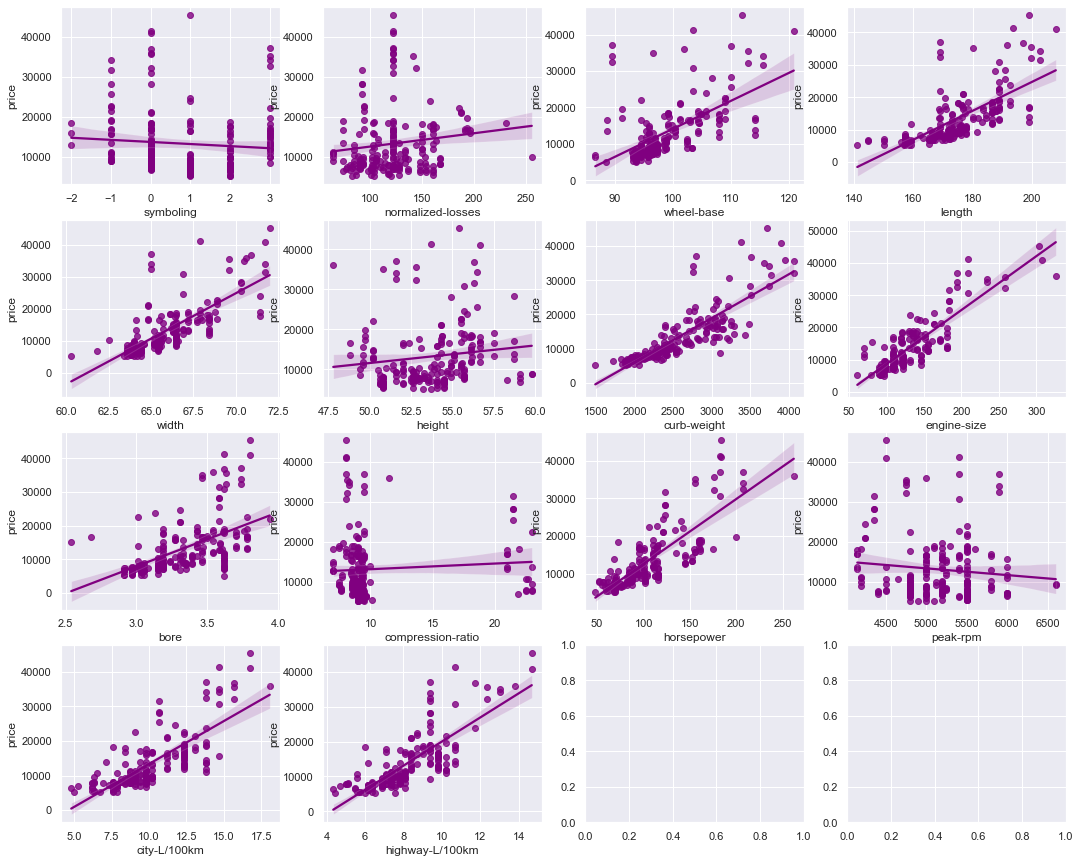

In [59]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=df,ax=axes[x][y],color='purple')

Strong Relationship

<ul>    
    <li>As the wheel base goes up, the price goes up: this indicates a positive direct correlation between these two variables. wheel base seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Lenght seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Width seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Curb weight seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Engine Size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Bore seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>Horsepower seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>City-L/100km seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>
    <li>highway-L/100km seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</li>    
</ul>

Weak Relationship
<ul>
    <li>symboling</li>
    <li>normalized-losses</li>
    <li>height</li>
    <li>bore</li>
    <li>stroke</li>
    <li>compression-ratio</li>
    <li>peak-rpm</li>
</ul>

### Conclusion: Important features

<hr>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>fuel-type</li>
    <li>aspiration</li>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


<p id="Model_Development" style="color:#005b96;font-family: Georgia, serif;font-size:22px;font-weight:bold" >4.Model Development</p> 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Table of Contents</h3>

<ol>
     <li><a href="#Features_preprocessing">Select important features and apply preprocessing and LabelEncoder</a></li>
     <li><a href="#Linear_Regression_Model">Linear Regression Model </a></li>
     <li><a href="#Random_Forest">Random Forest Regressor Model</a></li>
    
</ol>
</div>
<hr>


<p id="Features_preprocessing" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >4.1 Select important features and apply preprocessing and LabelEncoder</p>

In [60]:
x_data=df[['length','width','curb-weight','engine-size','horsepower','city-L/100km','highway-L/100km','wheel-base','bore','fuel-type','aspiration','drive-wheels']]
y_data=df['price']

In [61]:
X = x_data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
y=y_data

In [62]:
X.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,fuel-type,aspiration,drive-wheels
0,22,8,92,18,31,20,19,2,24,1,0,2
1,22,8,92,18,31,20,19,2,24,1,0,2
2,29,16,115,28,46,22,20,10,1,1,0,2
3,44,21,66,11,27,17,16,29,13,1,0,1
4,44,23,116,22,34,23,24,28,13,1,0,0


Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>. 

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])


number of test samples : 41
number of training samples: 160


<p id="Linear_Regression_Model" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >4.2 Linear Regression Model</p>

<hr>

In [64]:
lre=LinearRegression()

In [65]:
lre.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lre.predict(X_test)

In [67]:
# Mean Squared Error (MSE):

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18482369.697856802


In [68]:
# R-squared (R2):
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.6512484121552142


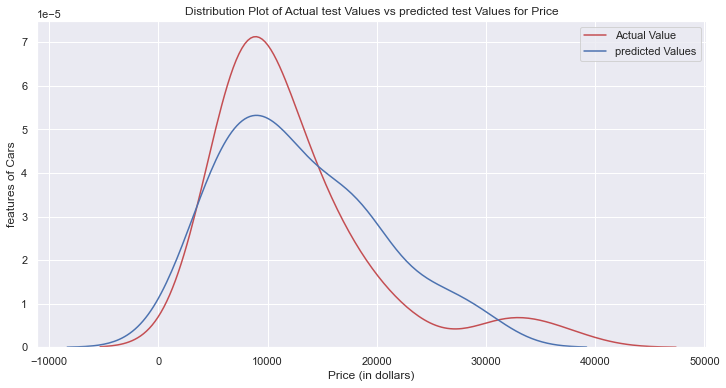

In [69]:
plt.figure(figsize=(12,6))


ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="predicted Values" , ax=ax1)


plt.title('Distribution Plot of Actual test Values vs predicted test Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('features of Cars')

# Show legend
ax1.legend()

plt.show()
plt.close()

<p id="Random_Forest" style="color:#005b96;font-family: Georgia, serif;font-size:18px;font-weight:bold" >4.3 Random Forest regressor</p>
<hr>

In [70]:
Rf = RandomForestRegressor()

In [71]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'squared_error',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_pred = Rf.predict(X_test)

In [72]:
# Mean Squared Error (MSE):

mse_RF = mean_squared_error(y_test, Rf_pred)
print(f'Mean Squared Error: {mse_RF}')

Mean Squared Error: 3446846.1383943087


In [73]:
# R-squared (R2):

r2 = r2_score(y_test, Rf_pred)
print(f'R-squared: {r2}')

R-squared: 0.9349600141392542


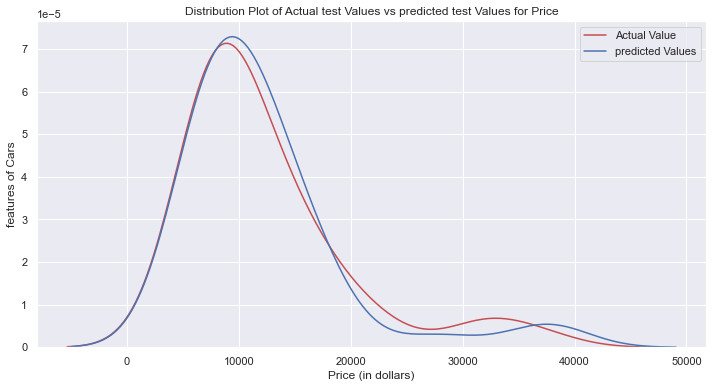

In [74]:
plt.figure(figsize=(12,6))


ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(Rf_pred, color="b", label="predicted Values" , ax=ax1)

plt.title('Distribution Plot of Actual test Values vs predicted test Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('features of Cars')

ax1.legend()

plt.show()
plt.close()

### Conclusion
We applied two models Linear Regressionand RandomForest Regressor

As we can see random forest performing best (with accuracy ~ 0.93)